In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import statsmodels.formula.api as sm

In [103]:
# Take in all of employment and unemployment data and read it into pandas
phoenix_employment = "Resources/Phoenix_employment_unemployment_2008-2019.csv"

phoenix_em_df = pd.read_csv(phoenix_employment)

phoenix_em_df.head()




,Year,Period,labor force,employment,unemployment,unemployment rate
0,2008,Jan,2080703,1993471,87232,4.2
1,2008,Feb,2074130,1991054,83076,4.0
2,2008,Mar,2077073,1988239,88834,4.3
3,2008,Apr,2076947,1989849,87098,4.2
4,2008,May,2075731,1979651,96080,4.6


In [104]:
# Refactor employment data
d = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
phoenix_em_df.Period = phoenix_em_df.Period.map(d)

phoenix_em_df["Month"] = phoenix_em_df['Year']*100+phoenix_em_df['Period']

phoenix_em_df = phoenix_em_df.loc[:, ["Month", "employment", "unemployment"]]
phoenix_em_df.head()

,Month,employment,unemployment
0,200801,1993471,87232
1,200802,1991054,83076
2,200803,1988239,88834
3,200804,1989849,87098
4,200805,1979651,96080


In [98]:
def get_month(date):
    year = date.year
    month = date.month
    return (year*100)+month

In [99]:
#Get Zillow data
label_file = "../Data Analysis/Phoenix_Zillow_Codes.xlsx"
labelsdf = pd.read_excel(label_file)
labelsdf = labelsdf.drop(labelsdf.columns[2],axis=1)

data_file = "../Data Analysis/Zillow_pivot_cleaned.csv"
df = pd.read_csv(data_file, parse_dates=['Date'])

for code in df.columns:
    if code!='Date':
        df[code] = df[code].astype(float)
        
df.head()

df["Month"] = df["Date"].apply(get_month)
df.head()

,Date,C36159_BSICG,C36159_BSICT,C36159_DOZ,C36159_FOR10K,C36159_MDLNSAH,C36159_MDLSAAH,C36159_MLNSAH,C36159_MLSAAH,C36159_MTURN,...,C36159_SCSAMT,C36159_SCSATT,C36159_SCTT,C36159_SP,C36159_SPBT,C36159_SPFS,C36159_SPMT,C36159_SPTT,C36159_STLR,Month
0,2008-01-31,NaN,NaN,NaN,8.17,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200801
1,2008-02-29,NaN,NaN,NaN,9.26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200802
2,2008-03-31,NaN,NaN,NaN,9.89,NaN,NaN,NaN,NaN,0.0032,...,384.0,291.0,238.0,221500.0,156900.0,NaN,244300.0,465500.0,NaN,200803
3,2008-04-30,NaN,NaN,NaN,13.97,NaN,NaN,NaN,NaN,0.0039,...,349.0,260.0,314.0,212600.0,147400.0,NaN,240300.0,428200.0,NaN,200804
4,2008-05-31,NaN,NaN,NaN,14.80,NaN,NaN,NaN,NaN,0.0042,...,372.0,257.0,335.0,204600.0,137300.0,NaN,233500.0,413900.0,NaN,200805


In [106]:
# Merge data to compare employment, unemployment and median sales price
#employmentdf = pd.read_csv("../Data Analysis/employment.csv")
#unemploymentdf = pd.read_csv("../Data Analysis/unemployment.csv")

pricedf = df.loc[:, ["Month","C36159_SP"]]
pricedf = pricedf.rename(columns={"C36159_SP":"Median Sales Price"})

#newdf = pd.merge(employmentdf, unemploymentdf, left_on='Month', right_on='Month')
newdf = pd.merge(phoenix_em_df, pricedf, left_on='Month', right_on='Month')

newdf.sort_values("Month", inplace=True)
newdf = newdf.loc[newdf["Median Sales Price"] > 0]

newdf.index = range(len(newdf.index))
newdf.head()

#newdf.to_csv(r'rawlist.csv')

,Month,employment,unemployment,Median Sales Price
0,200803,1988239,88834,221500.0
1,200804,1989849,87098,212600.0
2,200805,1979651,96080,204600.0
3,200806,1978204,113694,195700.0
4,200807,1965921,122221,186600.0


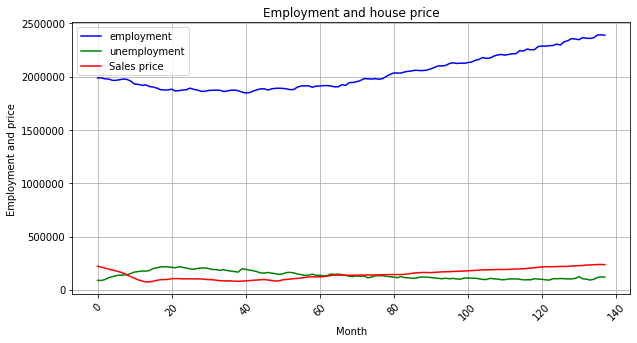

In [141]:
x = range(len(newdf["Month"]))

newdf_fig = plt.figure(figsize=(10,5))

plt.title("Employment and house price")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Employment and price")
plt.plot(x,newdf['employment'],'-',color='blue',label="employment")
plt.plot(x,newdf['unemployment'],'-',color='green',label="unemployment")
plt.plot(x,newdf['Median Sales Price'],'-',color='red',label='Sales price')
plt.legend()
plt.grid(True)